<a href="https://colab.research.google.com/github/Ashupathak2001/Prasunet_Task/blob/main/Prasunet_Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the all main libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(columns = ["CustomerID"],inplace = True,axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:


import pandas as pd


# to replace 'male' with 1 and 'female' with 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Now your 'gender' column contains 1 for 'male' and 0 for 'female'

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


now by using elbow method we will come to know that what is the best number of clusters or groups
for the given data set

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = [] # within cluster sum of squared distances
for i in range(1,21):
    km = KMeans(n_clusters = i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [7]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51132.70321257687,
 44389.80767355767,
 40699.84523062438,
 37552.72402597403,
 34453.26489633733,
 32576.101946299306,
 30470.76747768514,
 27638.665873015878,
 26219.29208671171,
 24920.877184949546,
 23577.104876645095,
 22115.85552003409,
 20772.491548892292,
 19764.050003213164]

In [8]:
len(wcss)

20

Text(0.5, 1.0, 'number of clusters vs wcss')

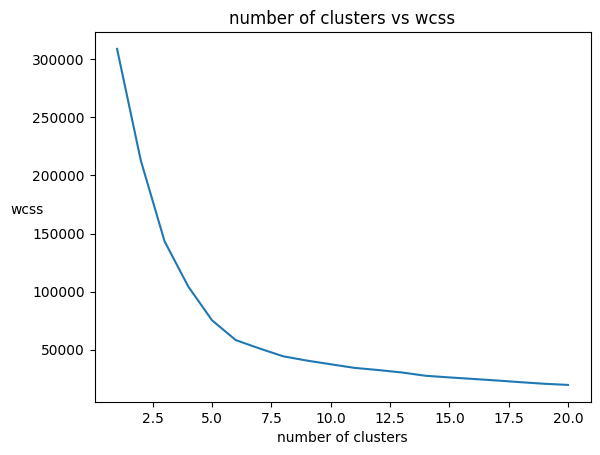

In [9]:
# now drawing the plot between number of clusters vs wcss
plt.plot(range(1,21),wcss)
plt.xlabel("number of clusters")
plt.ylabel("wcss",rotation = 0)
plt.title("number of clusters vs wcss")

In [10]:
km = KMeans(n_clusters = 6)
y_means = km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 2, 0,
       4, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 5, 1, 5, 1, 5, 1,
       0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [12]:
len(y_means)

200

In [13]:
df["cluster"] = y_means
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,5
197,1,32,126,74,1
198,1,32,137,18,5



now its time to visualize the clusters formed by using diffrent technique
to visualize four dimensional data we will use the dimensioanality reduction technique

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [15]:
features = ["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]

In [16]:
import plotly.express as px


In [17]:
fig = px.scatter_matrix(df,dimensions = features,color = 'cluster')
fig.show()

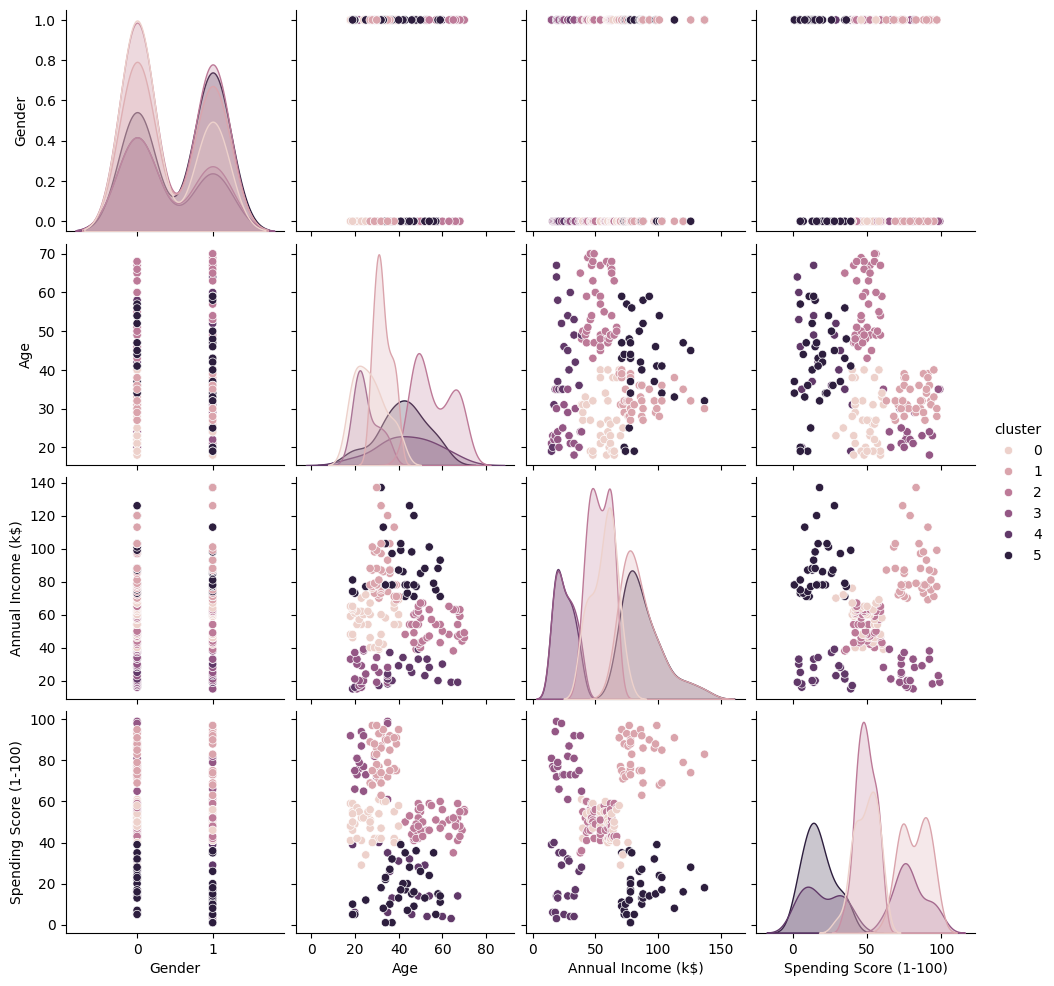

In [18]:
sns.pairplot(df,hue = 'cluster')

project data into two dimension with t-SNE and px.scatter

In [19]:
from sklearn.manifold import TSNE
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,5
197,1,32,126,74,1
198,1,32,137,18,5


In [20]:
features = df.loc[:, :'Spending Score (1-100)']

features



,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [21]:


tsne = TSNE(n_components = 2,random_state = 0)
projections = tsne.fit_transform(features)


fig = px.scatter(
projections,x=0,y=1,
color = df.cluster,labels = {'color':'cluster'})
fig.show()



now projecting data into three dimension with t-SNE and px.scatter

In [22]:
tsne = TSNE(n_components = 3,random_state = 0)
projections = tsne.fit_transform(features)


fig = px.scatter_3d(
projections,x=0,y=1,z=2,
color = df.cluster,labels = {'color':'cluster'})
fig.update_traces(marker_size=8)
fig.show()

In [23]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00


In [24]:
from umap import UMAP
import plotly.express as px





umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.cluster, labels={'color': 'cluster'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.cluster, labels={'color': 'cluster'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

